In [49]:
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import collections


Exercise 1 

In [50]:

def compute_total_cost(solution, distances):
    """Compute the total cost of a given solution

    Examples
    --------
    >>> solution = np.array([0, 1, 2, 3, 4, 5])
    >>> distances = np.array([
    ...    [0, 5, 3, 4, 2, 3],
    ...    [5, 0, 2, 8, 3, 9],
    ...    [3, 2, 0, 2, 5, 8],
    ...    [4, 8, 2, 0, 6, 9],
    ...    [2, 3, 5, 6, 0, 1],
    ...    [3, 9, 8, 9, 1, 0],
    ... ], dtype=float)
    >>> compute_total_cost(solution, distances)
    19.0

    Parameters
    ----------
    solution : ndarray
        1D array of shape (n_cities,) with `int` dtype representing
        the solution whose length is to be computed.
    distances : ndarray
        2D array of shape (n_cities, n_cities) with `float` dtype
        representing the distance matrix.

    Returns
    -------
    length : float
    """
    # Question 1
    n_cities = solution.shape[0]
    cost = 0.0
    for i in range(n_cities):
        j = (i + 1) % n_cities
        cost += distances[solution[i], solution[j]]
    return cost

In [66]:
#test
solution = np.array([0, 1, 2, 3, 4, 5])
distances = np.array([[0, 5, 3, 4, 2, 3],
                      [5, 0, 2, 8, 3, 9],
                      [3, 2, 0, 2, 5, 8],
                      [4, 8, 2, 0, 6, 9],
                      [2, 3, 5, 6, 0, 1],
                      [3, 9, 8, 9, 1, 0],
                      ], dtype=float)
compute_total_cost(solution, distances)

19.0

Exercise 2

In [1]:

def run_greedy_heuristic(distances):
    """Run a greedy heuristic for TSP

    This runs a greedy heuristic for TSP and return a feasible solution.
    This starts at city 0 and creates a soltuion by finding the shortest
    cities greedily.

    Examples
    --------
    >>> distances = np.array([
    ...    [0, 5, 3, 4, 2, 3],
    ...    [5, 0, 2, 8, 3, 9],
    ...    [3, 2, 0, 2, 5, 8],
    ...    [4, 8, 2, 0, 6, 9],
    ...    [2, 3, 5, 6, 0, 1],
    ...    [3, 9, 8, 9, 1, 0],
    ... ], dtype=float)
    >>> run_greedy_heuristic(distances)
    array([0, 4, 5, 2, 1, 3])
    >>> compute_total_cost(run_greedy_heuristic(distances), distances)
    25.0

    Parameters
    ----------
    distances : ndarray
        2D array of shape (n_cities, n_cities) with `float` dtype
        representing the distance matrix.

    Returns
    -------
    solution : ndarray
        1D array of shape (n_cities,) with `int` dtype representing
        the solution obtained by the greedy heuristic.
    """

    c = 0
    x = c.sort()

In [ ]:
    
distances = np.array([
    [0, 5, 3, 4, 2, 3],
    [5, 0, 2, 8, 3, 9],
    [3, 2, 0, 2, 5, 8],
    [4, 8, 2, 0, 6, 9],
    [2, 3, 5, 6, 0, 1],
    [3, 9, 8, 9, 1, 0],], dtype=float)

    run_greedy_heuristic(distances)
    array([0, 4, 5, 2, 1, 3])
    compute_total_cost(run_greedy_heuristic(distances), distances)
    #25.0

Exercise 3

In [56]:
def two_opt(solution):
    """Return a neighbour of a given solution based on two-opt

    This returns a neighbouring solution.

    Examples
    --------
    >>> solution = np.array([0, 1, 2, 3])
    >>> sample_two_opt(solution)  # doctest: +SKIP
    array([0, 2, 1, 3])

    Parameters
    ----------
    solution : ndarray
        1D array of shape (n_cities,) with `int` dtype representing
        the current solution.

    Returns
    -------
    new_solution : ndarray
        1D array of shape (n_cities,) with `int` dtype representing
        the sampled solution.
    """
    # Store the current solution and its length
    current_solution = solution
    current_solution_length = compute_total_cost(solution, distances)
    # Get the number of cities
    n_cities = len(solution)

    # Set a flag to keep track of whether an improvement was made
    improve = True
    # Keep looping until no improvement can be made
    while improve:
        # Set the flag to False at the beginning of each iteration
        improve = False

        # Loop over a fixed number of iterations
        for x in range(100):
            # Get the number of cities again, in case it changed
            n_cities = len(solution)
            # Select two random indices i and j, with i < j
            i = np.random.randint(n_cities-1)
            j = np.random.randint(i+1, n_cities)

            # Create a new solution by reversing the order of cities between i and j
            new_solution = np.concatenate((solution[:i], solution[i:j+1][::-1], solution[j+1:]))
            # Compute the length of the new tour
            new_solution_length = compute_total_cost(new_solution, distances)

            # If the new solution is better, update the current solution
            if (new_solution_length<current_solution_length):
                improve = True
                current_solution=new_solution
                current_solution_length = new_solution_length
                break

    # Return the best solution found
    return current_solution


print(two_opt(solution))

[0 1 2 3]


In [62]:
def sample_two_opt(solution):
    """Return a neighbour of a given solution based on two-opt

    This returns a neighbouring solution.

    Examples
    --------
    >>> solution = np.array([0, 1, 2, 3])
    >>> sample_two_opt(solution)  # doctest: +SKIP
    array([0, 2, 1, 3])

    Parameters
    ----------
    solution : ndarray
        1D array of shape (n_cities,) with `int` dtype representing
        the current solution.

    Returns
    -------
    new_solution : ndarray
        1D array of shape (n_cities,) with `int` dtype representing
        the sampled solution.
    """

    n_cities = len(solution)
    # Select two random indices i and j, with i < j
    i = np.random.randint(n_cities-1)
    j = np.random.randint(i+1, n_cities)

    # Create a new solution by reversing the order of cities between i and j
    new_solution = np.concatenate((solution[:i], solution[i:j+1][::-1], solution[j+1:]))
    # Compute the length of the new tour
            
    return new_solution



solution = np.array([0, 1, 2, 3])


print(sample_two_opt(solution))

[0 2 1 3]


Exercise 4

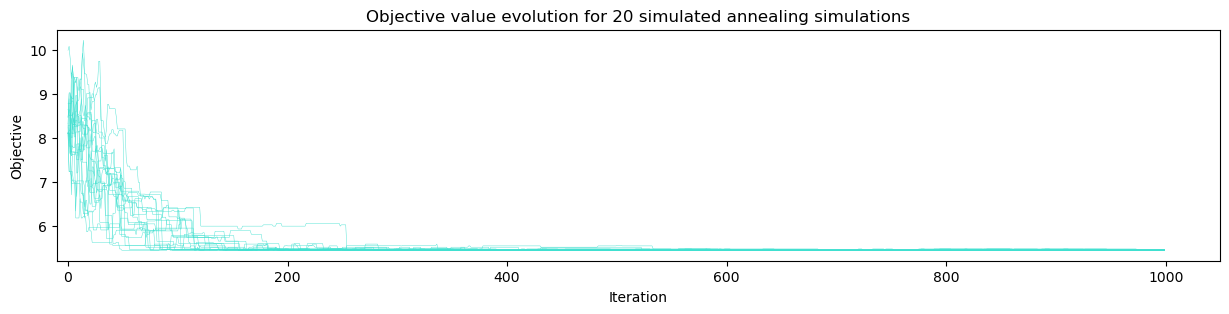

In [147]:
SolverResult = collections.namedtuple(
    "SolverResult", "objective solution objective_list"
)


distances = np.load('distances.npy')

def temperature(current_iteration):
    return(1/(0.1*current_iteration+1))


def run_simulated_annealing(
    initial_solution,
    objective,
    sample,
    n_epochs,
    temperature,
):
    """Run simulated annealing

    Parameters
    ----------
    solution : ndarray
        1D array of shape (n_cities,) with `int` dtype representing
        the initial solution.
    objective : callable
        Objective function of the following signature:
        (solution: ndarray of shape (n_cities,)) -> float.
    sample : callable
        A function to sample a neighbouring solution.
        This should have the following signature:
        (solution: ndarray of shape (n_cities,))
        -> ndarray of shape (n_cities,).
    n_epochs : int
        Number of epochs
    temperature : callable
        A function to compute the temperature.
        This should have the following signature:
        (epoch: int) -> float.

    Returns
    -------
    objective : float
        The objective value of the best solution found.
    solution : ndarray
        1D array of shape (n_cities,) with `int` dtype representing
        the best solution found.
    objective_list : list of float
        The objective values of the iterates
    """
    best_solution = None  # Store the best solution on this variable.
    best_objective = np.inf  # Store the obj. value of `best_solution` on this.
    objective_list = []  # List to store the objective values of the iterate.

    # Question 4
    best_solution = initial_solution
    best_objective = objective(best_solution, distances)

    for epoch in range(n_epochs):
        new_solution = sample(best_solution)
        new_energy = objective(new_solution, distances)

        energy_difference = new_energy - best_objective

        if energy_difference < 0 or np.random.uniform() < np.exp(-energy_difference / temperature(epoch)):
            best_solution = new_solution
            best_objective = new_energy

        objective_list.append(best_objective)

    return best_solution, best_objective, objective_list

#------------------------------------------------------

def explore_sim_annealing_cluster(number_of_iterations):
    evolutions_matrix=[]

    for x in range(number_of_iterations):

        solution = np.array([0, 1, 2, 3,4,5,6,7,8,9])

        results=run_simulated_annealing(
            solution,
            compute_total_cost,
            sample_two_opt,
            1000,
            temperature,
        )

        best_objective_evolution=results[2]
        evolutions_matrix.append(best_objective_evolution)

    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(15, 3))

    # Plot each sublist as a line with a different color
    for sublist in evolutions_matrix:
        ax.plot(sublist,linewidth=0.3, color='turquoise')

    # Set the title and labels for the chart
    ax.set_title('Objective value evolution for 20 simulated annealing simulations')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Objective')
    ax.set_xlim(left=-10)
    # Display the chart
    plt.show()

explore_sim_annealing_cluster(20)

If we define the temperature function as temperature(k): return 100/(0.1*k-1), the temperature will decrease more slowly with each iteration compared to temperature(k): return 1/(0.1*k-1). This is because the numerator of the first function is much larger than the second function, and so the temperature will start at a much higher value and decrease more slowly. This slow decrease in temperature may cause the algorithm to converge to a local minimum or get stuck in a plateau, as it will continue to accept worse solutions with a higher probability for longer.

On the other hand, if we define the temperature function as temperature(k): return 1/(0.1*k-1), the temperature will decrease more quickly with each iteration compared to the first function. This is because the numerator of the second function is much smaller than the first function, and so the temperature will start at a much lower value and decrease more quickly. This rapid decrease in temperature may cause the algorithm to converge to a global minimum more quickly, as it will reduce the probability of accepting worse solutions sooner.